This notebook illustrates the motif detection. 
Such identifies interesting subsequences in your time series data.
Later you can use motifs to calculate new features.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
from pylab import rcParams

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from sklearn.ensemble import AdaBoostRegressor
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import motifs

import pandas_datareader.data as web
import datetime

import warnings
warnings.filterwarnings('ignore')

/home/kruglick/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Use google stock data to get a fairly arbitrary timeseries

In [3]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 1, 1)
x = web.DataReader("F", 'google', start, end)
x.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,13.87,14.00,13.75,13.97,38525811
2016-01-05,13.97,14.00,13.51,13.72,50267536
2016-01-06,13.56,13.56,13.05,13.11,61285453
2016-01-07,12.90,13.04,12.60,12.70,57846688
2016-01-08,13.05,13.10,12.50,12.54,46199413


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 5 columns):
Open      252 non-null float64
High      252 non-null float64
Low       252 non-null float64
Close     252 non-null float64
Volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


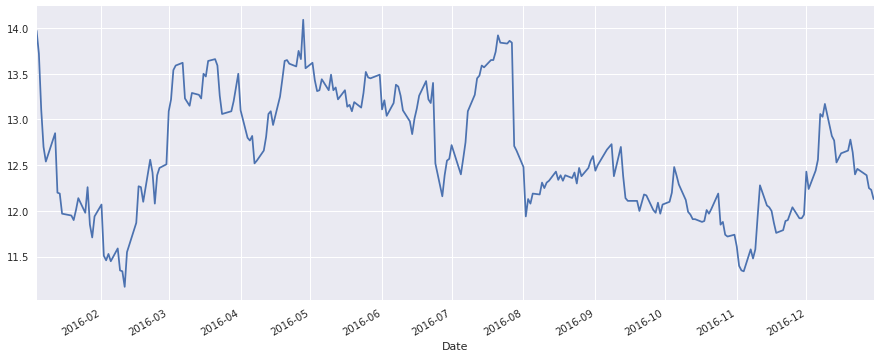

In [5]:
closing = x["Close"]
closing.plot(figsize=(15, 6))
plt.show()

# Manually calling motif finding

In [6]:
motif_length = 5
motif_count = 5
found_motifs = motifs.find_motifs(motif_length,x["Close"],motif_count)

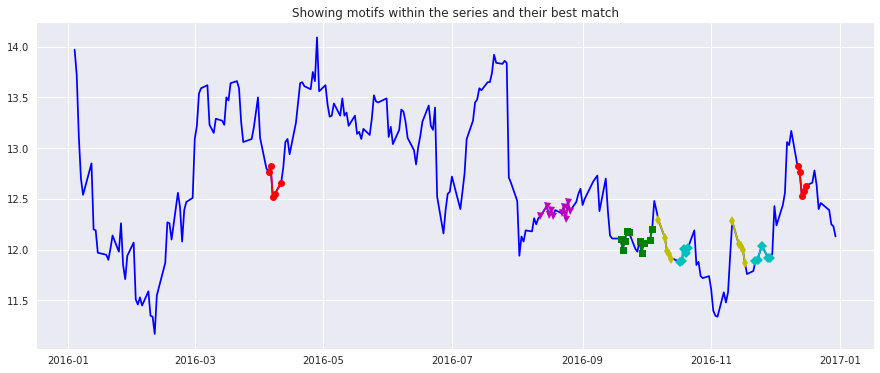

In [7]:
rcParams['figure.figsize'] = 15, 6
plt.plot(closing,'b-')
linestyles = ['r-o','g-s','y-d','m-v','c-D']
line_cycler = cycle(linestyles)
for start,match,quality in found_motifs:
    line_format = next(line_cycler)
    plt.plot(closing[start:start+motif_length],line_format) 
    plt.plot(closing[match:match+motif_length],line_format) 
plt.title("Showing motifs within the series and their best match")
plt.show()

### Generating features from Motifs

In [8]:
# Motif counts as a feature
distance = 0.5
for i,motif in enumerate(found_motifs):
    n = motifs.count_motifs(closing,motif, dist = distance)
    print("Motif {} has {} incidences with distance {} or less".format(i,n,distance))

Motif 0 has 29 incidences with distance 0.5 or less
Motif 1 has 61 incidences with distance 0.5 or less
Motif 2 has 64 incidences with distance 0.5 or less
Motif 3 has 61 incidences with distance 0.5 or less
Motif 4 has 53 incidences with distance 0.5 or less
